In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/ai_job_market_insights2.csv')
df['AI_Adoption_Level'] = df['AI_Adoption_Level'].astype('category').cat.codes
df=df[df['Job_Growth_Projection'] != 1]
df['Job_Growth_Projection'] = df['Job_Growth_Projection'].replace(2, 1)
df = df.drop('Remote_Friendly', axis=1)
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Job_Growth_Projection
1,4,7,0,6,2,0,5,93792,0
4,1,2,2,8,1,1,3,87752,0
7,1,7,2,1,2,1,4,86607,0
8,0,6,0,2,0,1,3,75015,1
9,7,2,1,6,0,1,1,96834,0


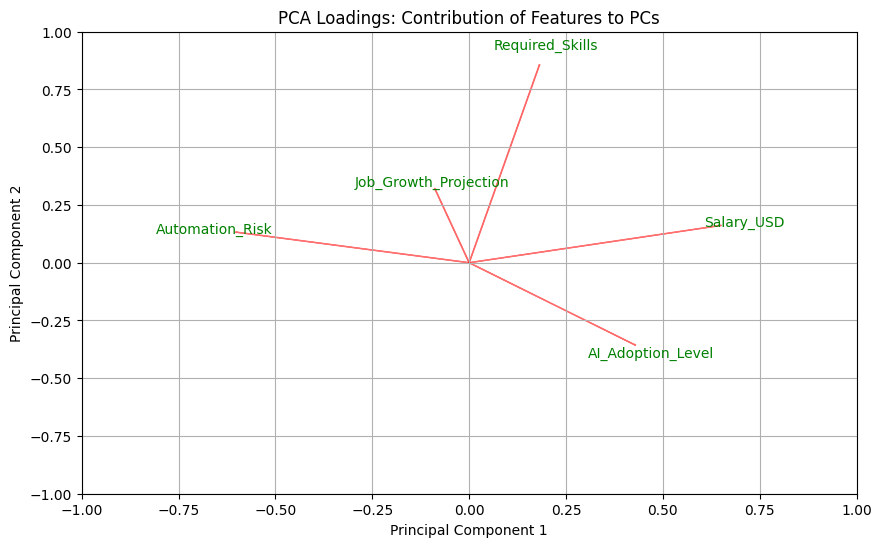

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the data
def standardize_data(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std
    return X_standardized

# Step 2: Compute covariance matrix
def compute_covariance_matrix(X):
    return np.cov(X.T)

# Step 3: Compute eigenvalues and eigenvectors
def compute_eigen_decomposition(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 4: Sort eigenvalues and eigenvectors
def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 5: Project data onto principal components
def project_data(X, eigenvectors, num_components):
    return X.dot(eigenvectors[:, :num_components])

# Perform PCA
def pca(X, num_components):
    X_standardized = standardize_data(X)
    cov_matrix = compute_covariance_matrix(X_standardized)
    eigenvalues, eigenvectors = compute_eigen_decomposition(cov_matrix)
    eigenvalues, eigenvectors = sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors)
    X_projected = project_data(X_standardized, eigenvectors, num_components)
    return X_projected, eigenvalues, eigenvectors

# Scree plot: Plot explained variance by each component
def plot_variance_explained(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Scree Plot: Explained Variance by Principal Components')
    plt.show()

# Plot feature loadings for the first two principal components
def plot_pca_loadings(eigenvectors, features):
    plt.figure(figsize=(10, 6))

    components = eigenvectors[:, :2]  # Loadings for the first two principal components
    for i, feature in enumerate(features):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        plt.text(components[i, 0] * 1.1, components[i, 1] * 1.1, feature, color='g', ha='center', va='center')

    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Loadings: Contribution of Features to PCs')
    plt.grid()
    plt.show()

# Example usage:

# Load your dataset (Assuming features have been selected)
features = df.drop(columns=['Job_Title', 'Industry', 'Company_Size', 'Location'])
X = features.values

# Apply PCA
num_components = 2
X_pca, eigenvalues, eigenvectors = pca(X, num_components)

# Plot the explained variance (Scree Plot)

# Plot the PCA loadings (how features contribute to PCs)
plot_pca_loadings(eigenvectors, features.columns)


<ipython-input-9-0cb03f25983b>:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')


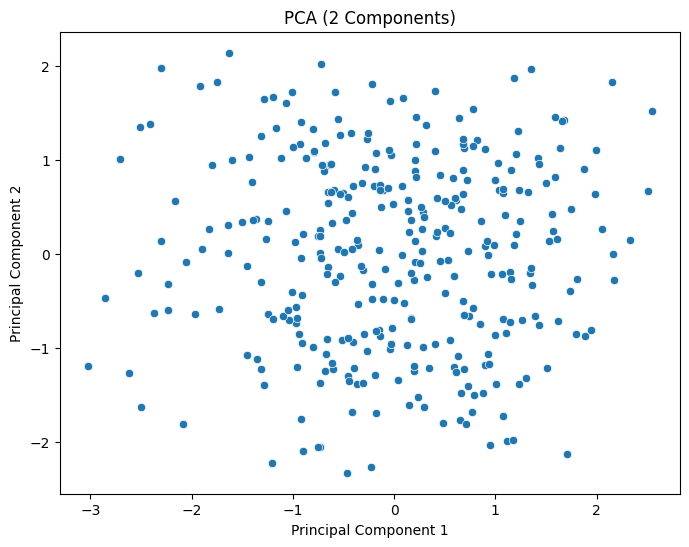

Projected Data (PCA): [[ 1.43078465e+00 -7.54878184e-01]
 [-1.49953935e-01 -8.13611038e-01]
 [ 4.04860006e-01 -9.56313163e-01]
 [-1.26209950e+00  1.59288343e-01]
 [-5.14244287e-01 -9.12261701e-01]
 [ 7.87461229e-01 -1.50030165e+00]
 [-1.64343642e+00  1.54701597e-02]
 [ 1.36985556e-01  4.61578695e-01]
 [ 1.63708329e+00  1.13125031e+00]
 [ 1.88983377e+00 -8.75921968e-01]
 [-3.02318228e+00 -1.19360060e+00]
 [-3.65076152e-01 -1.38282921e+00]
 [ 8.69196958e-02  1.65753439e+00]
 [ 7.83872250e-01  1.54205780e+00]
 [ 1.75231587e+00  4.79875128e-01]
 [-1.05030244e-01  6.82028825e-01]
 [-2.70871763e+00  1.00812191e+00]
 [ 1.79990059e+00 -8.49241025e-01]
 [-8.57228886e-03  5.32529832e-01]
 [ 5.90405994e-01 -2.30177523e-01]
 [ 1.80740057e+00 -2.69959534e-01]
 [ 1.03903202e+00  6.85788191e-01]
 [ 6.40645073e-01  1.44478858e+00]
 [ 1.07588070e+00  6.54016685e-01]
 [-2.98463153e-01 -8.50523967e-01]
 [ 9.99600809e-01  7.91221725e-01]
 [-1.06942430e+00  4.54957188e-01]
 [-9.25464750e-01  1.17075625e+00

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the data
def standardize_data(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std
    return X_standardized

# Step 2: Compute covariance matrix
def compute_covariance_matrix(X):
    return np.cov(X.T)

# Step 3: Compute eigenvalues and eigenvectors
def compute_eigen_decomposition(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 4: Sort eigenvalues and eigenvectors
def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 5: Project data onto principal components
def project_data(X, eigenvectors, num_components):
    return X.dot(eigenvectors[:, :num_components])

# Perform PCA
def pca(X, num_components):
    X_standardized = standardize_data(X)
    cov_matrix = compute_covariance_matrix(X_standardized)
    eigenvalues, eigenvectors = compute_eigen_decomposition(cov_matrix)
    eigenvalues, eigenvectors = sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors)
    X_projected = project_data(X_standardized, eigenvectors, num_components)
    return X_projected, eigenvalues, eigenvectors

# Visualization function for 2D and 3D plots
def visualize_pca(X_pca, num_components, labels=None):
    if num_components == 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA (2 Components)')
        plt.show()
    elif num_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Set2')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.title('PCA (3 Components)')
        plt.show()
    else:
        print(f"Visualization not supported for {num_components} components.")

# Example usage:

# Load your dataset
data = df
# Assuming features have been selected
features = data.drop(columns=['Job_Title', 'Industry', 'Company_Size', 'Location'])
X = features.values

# Apply PCA with 2 components for visualization
num_components = 2
X_pca, eigenvalues, eigenvectors = pca(X, num_components)

# Optional: If you have labels for color-coding (e.g., Job_Title, Industry), use them here
# labels = data['Job_Title']

# Visualize the PCA result (you can replace labels with another column if desired)
visualize_pca(X_pca, num_components, labels=None)  # or 'labels' if you have some labels to color-code

print("Projected Data (PCA):", X_pca)
print("Eigenvalues:", eigenvalues)
